WHY IS THIS DATA SET GOOD?

Workflow

* Pre-processing
 * Exploratory analysis
 * Missing data
 * Outliers

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# Import data
df = pd.read_csv('train.csv')

# Functions

In [113]:
# Create table for missing data analysis
def missingData_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Hello Moto!

In [114]:
# Overview
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [115]:
# Get columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [116]:
# Keep copy of original data set 
df_raw = df.copy()

# What do we expect?

xxx

* PassengerId
 * This is just an unique identification of each passenger. It is not expected to be relevant for our analysis.
* Survived
 * Crucial variable. To not sink in this exercise, our life depends on it.
* Pclass
 * This is the ticket class. According to [Marx](https://en.wikipedia.org/wiki/Karl_Marx), this should have an effect on the survival rate.
* Name
 * There are several studies (xxx, xxx, xxx) suggesting the influence of a name, especially when it is accompanied by a title. Let's keep an eye on this.
* Sex
 * Definetely important.
* Age
 * It should make difference. Children are usually evacuated first in a disaster, so we can think about a solution in silence...
* SibSp
 * Number of siblings/spouses aboard the Titanic. It will be important to understand if people where travelling alone or with their family.  	
* Parch
 * Number of parents/children aboard the Titanic. Plays with SibSp.
* Ticket
 * This is the ticket number. Unless it has some information about places, it shouldn't be important for prediction purposes.
* Fare
 * Same as Pclass. Let's see how funny it is to have [money in a rich man's world](https://youtu.be/wCtBVPnKDIA).
* Cabin
 * The cabin number can indicate where people were during the disaster. It wouldn't be surprising if it had some [influence](https://www.huffingtonpost.com/entry/safest-seat-on-a-plane_us_58f7dbd8e4b091e58f382505) in the final result.
* Embarked
 * When the sun rises, it rises for everyone. It's not expectable that people coming from Cherbourg are more unlucky than people coming from Southampton. Unless there is some second order effect, [like refusing to run away to keep your honor as a man](http://www.mindblowing-facts.org/2013/07/the-only-japanese-who-survived-the-titanic-lost-his-job-because-he-was-known-as-a-coward-in-japan-for-not-dying-with-the-other-passengers/), I would say that this variable is not important.
 
 
 
Paste:
* The social norm of "women and children first" Read more: http://www.dailymail.co.uk/sciencetech/article-1254788/Why-women-children-saved-Titanic-Lusitania.html#ixzz54KETWEPr

# Before we start...

xxx

Continuous variables xxx. int64, float64, object

By contrast, categorical variables xxx.
* limited, and usually fixed, number of possible values

In [117]:
# Get variables type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

* PassengerID. It's not relevant because it doesn't have any effect in the analysis.
* Survived. We should change to categorical.
* Pclass. Like 'Survived', we should change to categorical.
* Name. For now it can remain as a string.
* Sex. It is a categorical variable.
* Age. Continuous variable.
* SibSp. It is a continuous variables.
* Parch. Continuous variable.
* Ticket. Like name, it should be solved later.
* Fare. Continuous.
* Cabin. Solved later.
* Embarked. Categorical.

Different way to organize:
* Continuous variables.
* Categorical variables.
* Text variables.

In [118]:
# Change variables to categorical data
#df['Survived'] = df['Survived'].astype('category')
#df['Pclass'] = df['Pclass'].astype('category')
#df['Sex'] = df['Sex'].astype('category')
#df['Embarked'] = df['Embarked'].astype('category')

In [119]:
# Debug
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
# Delete columns that we don't need
df = df.drop('PassengerId', axis=1)

In [121]:
# Debug
df

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          0       3                     Saundercock, Mr. William Henry   
13          0       3                        Andersson, Mr. Anders Johan   
14          0       3               Vestrom, Miss. Hulda Amanda Adolfina   
15          1       2                   Hewlett, Mrs. (Mary D Kingcome)    
16          0       3                               Rice, Master. Eugene   
17          1       2                       Williams, Mr. Charles Eugene   
18          0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19          1       3                            Masselmani, Mrs. Fatima   
20          0       2                               Fynney, Mr. Joseph J   
21          1       2                              Beesley, Mr. Lawrence   
22          1       3                        McGowan, Miss. Anna "Annie"   
23          1       1                       Sloper, Mr. William Thompson   
24          0       3                      Palsson, Miss. Torborg Danira   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26          0       3                            Emir, Mr. Farred Chehab   
27          0       1                     Fortune, Mr. Charles Alexander   
28          1       3                      O'Dwyer, Miss. Ellen "Nellie"   
29          0       3                                Todoroff, Mr. Lalio   
..        ...     ...                                                ...   
861         0       2                        Giles, Mr. Frederick Edward   
862         1       1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863         0       3                  Sage, Miss. Dorothy Edith "Dolly"   
864         0       2                             Gill, Mr. John William   
865         1       2                           Bystrom, Mrs. (Karolina)   
866         1       2                       Duran y More, Miss. Asuncion   
867         0       1               Roebling, Mr. Washington Augustus II   
868         0       3                        van Melkebeke, Mr. Philemon   
869         1       3                    Johnson, Master. Harold Theodor   
870         0       3                                  Balkic, Mr. Cerin   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                           Carlsson, Mr. Frans Olof   
873         0       3                        Vander Cruyssen, Mr. Victor   
874         1       2              Abelson, Mrs. Samuel (Hannah Wizosky)   
875         1       3                   Najib, Miss. Adele Kiamie "Jane"   
876         0       3                      Gustafsson, Mr. Alfred Ossian   
877         0       3                               Petroff, Mr. Nedelio   
878         0       3                                 Laleff, Mr. Kristo   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
880         1       2       Shelley, Mrs. William (Imanita Parrish Hall)   
881         0       3                                

# Preparing the data set

In [122]:
# Descriptive statistics
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

I confess that descriptive statistics is something that I used to do without knowing why. I was just doing because it was a standard thing to do. Now, I've a different idea of descriptive statistics. When I do it, I'm essentially looking for:

* Max or min values that doesn't make sense (extract line from Kelleher 2015). 
* Assess the variability of the data (standard deviation ratio???).
* Get an idea of the most common values (quartiles).

In this case, we can see that all the values seem to be in a range of plausible values. For example, xxx.

Although there are some values completely out of the range. For example, 'Fare' has ~512.33 as maximum value and its 75% quartile is 31. This can suggest that ~512.33 is an outlier. However, knowing the meaning of 'Fare' it's worth to consider that maybe it makes more sense to bin the data and have something like 'Cheap', 'Normal' and 'Expensive' fares.

## Age

We could bin data according to some statistical rule (Sturge's rule). However, let's think. Imagine that you're in the Titanic. How would you define who's a kid and who's an adult? Using a statistical rule? Probably not. The most common would say to define someone with less than xxx years old as a kid.

What was considered to be a child in 1912? Notice that we times were much different in 1912, when the Titanic sunk. To get an idea of what would mean to be a kid during those times, we need to read literature from those times. That's why we went for a paper from 1922. In Wellbye (1922), the following life stages are presented:
* Natency - 5 to 8 days after birth; 
* Infancy - extending to the 8th or 9th month;
* Wealinghood - extending to about the middle of the 3rd year;
* Childhood - extending into the 7th year;
* Pubescence - extending to about the 14th year;
* Adolescence - extending to the 18th year;
* Youth - completed about the 25th year;
* Maturity - extending to about the 60th year;
* Old age - all the others.

For our purposes, this list is too granular. In my opinion, the critical point is to decide what his a child because this is the age category that will be saved. Looking to the list, I'm not sure if I should consider that adolescents had the same treatment as pubescents. Accordingly, we will draw some plots to understand what we should do.

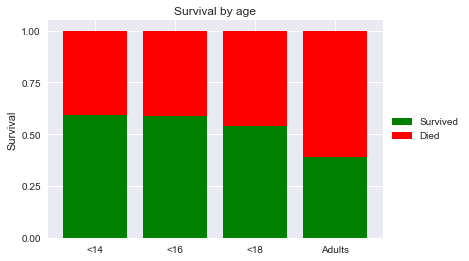

In [123]:
# Stacked bar plot

# Get values
surv_age14 = df['Age'][(df['Age']<14) & (df['Survived']==1)].count()/df['Age'][(df['Age']<14)].count()
died_age14 = df['Age'][(df['Age']<14) & (df['Survived']==0)].count()/df['Age'][(df['Age']<14)].count()

surv_age16 = df['Age'][(df['Age']<16) & (df['Survived']==1)].count()/df['Age'][(df['Age']<16)].count()
died_age16 = df['Age'][(df['Age']<16) & (df['Survived']==0)].count()/df['Age'][(df['Age']<16)].count()

surv_age18 = df['Age'][(df['Age']<18) & (df['Survived']==1)].count()/df['Age'][(df['Age']<18)].count()
died_age18 = df['Age'][(df['Age']<18) & (df['Survived']==0)].count()/df['Age'][(df['Age']<18)].count()

surv_adult = df['Age'][(df['Age']>18) & (df['Age']<60) & (df['Survived']==1)].count()/df['Age'][(df['Age']>18) & (df['Age']<60)].count()
died_adult = df['Age'][(df['Age']>18) & (df['Age']<60) & (df['Survived']==0)].count()/df['Age'][(df['Age']>18) & (df['Age']<60)].count()

# Build plot
# Based on: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
n = 4
surv = (surv_age14, surv_age16, surv_age18, surv_adult)
died = (died_age14, died_age16, died_age18, died_adult)
ind = np.arange(n)

p1 = plt.bar(ind, surv, color='green')
p2 = plt.bar(ind, died, bottom=surv, color='red')

plt.ylabel('Survival')
plt.title('Survival by age')
plt.xticks(ind, ('<14', '<16', '<18', 'Adults'))
plt.yticks(np.arange(0, 1.2, .25))
plt.legend((p1[0], p2[0]), ('Survived', 'Died'), loc='center left', bbox_to_anchor=(1, 0.5))

As shown in the Figure, there is a significant difference in the survival rate for Adults, when compared to the other age groups. Consequently, we will simplify Wellbye's suggestion and consider:
* Child - extending to the 18th year;
* Adults - extending to about the 60th year;
* Elders - all the other;

* I need to automate the creation of the data for the plot **above!**

In [124]:
# Bin data
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 60, 200], labels=['Child','Adult','Elder'])

In [125]:
# Debug
df

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          0       3                     Saundercock, Mr. William Henry   
13          0       3                        Andersson, Mr. Anders Johan   
14          0       3               Vestrom, Miss. Hulda Amanda Adolfina   
15          1       2                   Hewlett, Mrs. (Mary D Kingcome)    
16          0       3                               Rice, Master. Eugene   
17          1       2                       Williams, Mr. Charles Eugene   
18          0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...   
19          1       3                            Masselmani, Mrs. Fatima   
20          0       2                               Fynney, Mr. Joseph J   
21          1       2                              Beesley, Mr. Lawrence   
22          1       3                        McGowan, Miss. Anna "Annie"   
23          1       1                       Sloper, Mr. William Thompson   
24          0       3                      Palsson, Miss. Torborg Danira   
25          1       3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...   
26          0       3                            Emir, Mr. Farred Chehab   
27          0       1                     Fortune, Mr. Charles Alexander   
28          1       3                      O'Dwyer, Miss. Ellen "Nellie"   
29          0       3                                Todoroff, Mr. Lalio   
..        ...     ...                                                ...   
861         0       2                        Giles, Mr. Frederick Edward   
862         1       1  Swift, Mrs. Frederick Joel (Margaret Welles Ba...   
863         0       3                  Sage, Miss. Dorothy Edith "Dolly"   
864         0       2                             Gill, Mr. John William   
865         1       2                           Bystrom, Mrs. (Karolina)   
866         1       2                       Duran y More, Miss. Asuncion   
867         0       1               Roebling, Mr. Washington Augustus II   
868         0       3                        van Melkebeke, Mr. Philemon   
869         1       3                    Johnson, Master. Harold Theodor   
870         0       3                                  Balkic, Mr. Cerin   
871         1       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
872         0       1                           Carlsson, Mr. Frans Olof   
873         0       3                        Vander Cruyssen, Mr. Victor   
874         1       2              Abelson, Mrs. Samuel (Hannah Wizosky)   
875         1       3                   Najib, Miss. Adele Kiamie "Jane"   
876         0       3                      Gustafsson, Mr. Alfred Ossian   
877         0       3                               Petroff, Mr. Nedelio   
878         0       3                                 Laleff, Mr. Kristo   
879         1       1      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)   
880         1       2       Shelley, Mrs. William (Imanita Parrish Hall)   
881         0       3                                

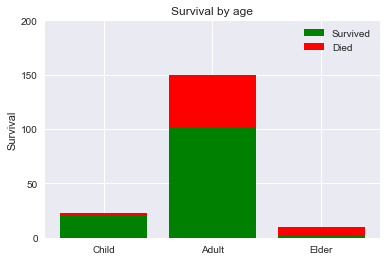

In [126]:
# Stacked plot (categorical data)
surv_child = df[(df['Survived']==1) & (df['Age']=='Child')].dropna().count()[0] 
died_child = df[(df['Survived']==0) & (df['Age']=='Child')].dropna().count()[0]
surv_adult = df[(df['Survived']==1) & (df['Age']=='Adult')].dropna().count()[0] 
died_adult = df[(df['Survived']==0) & (df['Age']=='Adult')].dropna().count()[0] 
surv_elder = df[(df['Survived']==1) & (df['Age']=='Elder')].dropna().count()[0] 
died_elder = df[(df['Survived']==0) & (df['Age']=='Elder')].dropna().count()[0] 

n = 3
surv = (surv_child, surv_adult, surv_elder)
died = (died_child, died_adult, died_elder)
ind = np.arange(n)

p1 = plt.bar(ind, surv, color='green')
p2 = plt.bar(ind, died, bottom=surv, color='red')

plt.ylabel('Survival')
plt.title('Survival by age')
plt.xticks(ind, ('Child', 'Adult', 'Elder'))
plt.yticks(np.arange(0, 250, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Died'));

* It seems that to be a child increases the survival rate.
* xxx

# Name

In [127]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

* The rule seems to be: 'last name' + ',' + 'title' + 'other names'
* From this, we want to keep xxx.

In [128]:
df['Title']=0
for i in df:
    df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

* I don't know if I need the last name.

In [129]:
# Unique titles
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [130]:
# Debug
# Use 'Sex' for debug because titles are associated with gender
pd.crosstab(df['Title'], df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

* We have some uncommon titles, many of them associated with nobility (e.g., Countess).
* We have some titles that could be associated to a different label.
 * Mlle = mademoiselle --> Miss --> Unmarried young lady
 * Mme = madame --> Mrs --> Married women
* We will regroup the title. It's more important to have them by relevant groups (e.g., Miss and Mrs titles have information about being married or not, which can suggest if the person was alone or not).

# Siblings and children

Here, it makes sense to understand if it's better to travel with your family or not. This is an important conclusion for you to decide if you should travel in family or not. Accordingly, one obvious decision is to create two labels: with family and without family. 

I'm not sure if family size matters. Probably yes, although we a big mess of data. For example, we would need some additional work to take 'Parch' and separate what refers to parents and what refers to children (play with ages and Parch number to guess what is what). It seems important, but not critical. If the model doesn't give good enough results, we can come back (I've been in the future and I know that we will not need to do that).

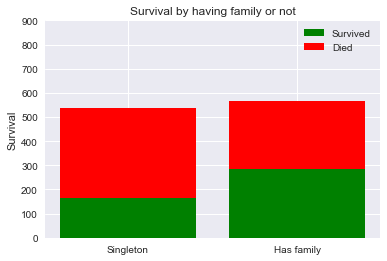

In [131]:
# Influence of family on survival
died_alone = df[(df['Parch']==0) & (df['SibSp']==0) & (df['Survived']==0)].count()[0]
survived_alone = df[(df['Parch']==0) & (df['SibSp']==0) & (df['Survived']==1)].count()[0]
died_family = df[(df['Parch']>0) | (df['SibSp']>0) & (df['Survived']==0)].count()[0]
survived_family = df[(df['Parch']>0) | (df['SibSp']>0) & (df['Survived']==1)].count()[0]

n=2
surv = [survived_alone, survived_family]
died = [died_alone, survived_family]
ind = np.arange(n)

p1 = plt.bar(ind, surv, color='green')
p2 = plt.bar(ind, died, bottom=surv, color='red')

plt.ylabel('Survival')
plt.title('Survival by having family or not')
plt.xticks(ind, ('Singleton', 'Has family'))
plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('Survived', 'Died'));

* As we can see, having a family makes difference.
* Does the size of the family influence?
* We will replace SibSp and Parch by a new feature called 'Family'.

In [132]:
# Create feature for family
df['Family'] = 0
idx_family = df[(df['Parch']>0) | (df['SibSp']>0) & (df['Survived']==0)].index
df.set_value(idx_family, 'Family', 1)
df.loc[idx_family].head()  # Debug

Survived  Pclass                                               Name  \
0          0       3                            Braund, Mr. Owen Harris   
7          0       3                     Palsson, Master. Gosta Leonard   
8          1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
10         1       3                    Sandstrom, Miss. Marguerite Rut   
13         0       3                        Andersson, Mr. Anders Johan   

       Sex    Age  SibSp  Parch     Ticket     Fare Cabin Embarked   Title  \
0     male  Adult      1      0  A/5 21171   7.2500   NaN        S      Mr   
7     male  Child      3      1     349909  21.0750   NaN        S  Master   
8   female  Adult      0      2     347742  11.1333   NaN        S     Mrs   
10  female  Child      1      1    PP 9549  16.7000    G6        S    Miss   
13    male  Adult      1      5     347082  31.2750   NaN        S      Mr   

    Family  
0        1  
7        1  
8        1  
10       1  
13       1

In [133]:
# Drop variables
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex    Age            Ticket     Fare Cabin Embarked Title  Family  
0    male  Adult         A/5 21171   7.2500   NaN        S    Mr       1  
1  female  Adult          PC 17599  71.2833   C85        C   Mrs       0  
2  female  Adult  STON/O2. 3101282   7.9250   NaN        S  Miss       0  
3  female  Adult            113803  53.1000  C123        S   Mrs       0  
4    male  Adult            373450   8.0500   NaN        S    Mr       0

# Missing data 
This should come after but the point is that it I'll lose information for this analysis, so I should do it now.

In [134]:
missingData_table(df)

Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245
Family        0  0.000000
Title         0  0.000000
Fare          0  0.000000
Ticket        0  0.000000
Sex           0  0.000000
Name          0  0.000000
Pclass        0  0.000000
Survived      0  0.000000

* Cabin is an high percentage of missing data. I don't see any obvious way to solve it. Maybe exploring information from the **ticket**.
* Age I can fill the data. Use titles, survived, gender, and family.
* Embarked can be given by ticket, fare, cabin or pclass.
* Incremental filling of missing data (refer paper)
* I could create a model for this and impute missing data using random forests
* Embarked is such a small value that I'll delete the cases (an alternative could be explore regex in ticket to extract info; it would show readers how to use it)

## Embarked

In [135]:
# Identify rows where 'Embarked' is null
index_nullEmbarked = df[df['Embarked'].isnull()].index
index_nullEmbarked

Int64Index([61, 829], dtype='int64')

In [136]:
# Drop rows where 'Embarked is null
df.drop(index_nullEmbarked, inplace=True)
df[df['Embarked'].isnull()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, Ticket, Fare, Cabin, Embarked, Title, Family]
Index: []

# Cabin

In [137]:
# Drop 'Cabin'
df.drop('Cabin',axis=1,inplace=True)

# Age

Useful information for age:
* Ticket fare/Pclass. Children pay less.
* Imputation by age group is enough.
* Sex.
* Title.
* SibSp and Parch should be different from zero.
Let's test everything.

In [138]:
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex    Age            Ticket     Fare Embarked Title  Family  
0    male  Adult         A/5 21171   7.2500        S    Mr       1  
1  female  Adult          PC 17599  71.2833        C   Mrs       0  
2  female  Adult  STON/O2. 3101282   7.9250        S  Miss       0  
3  female  Adult            113803  53.1000        S   Mrs       0  
4    male  Adult            373450   8.0500        S    Mr       0

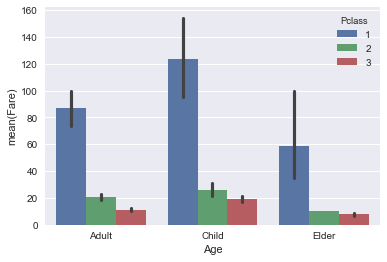

In [139]:
# Group by age
sns.barplot(x='Age',y='Fare',hue='Pclass',data=df)

* Elder pay always less
* High variance in first class prices
* Child pay always more

In [140]:
# Table for title analysis
df.groupby(['Age','Title'])['Survived'].count()

Age    Title   
Adult  Col           2
       Countess      1
       Don           1
       Dr            6
       Jonkheer      1
       Lady          1
       Major         2
       Miss         83
       Mlle          2
       Mme           1
       Mr          345
       Mrs          99
       Ms            1
       Rev           6
       Sir           1
Child  Master       36
       Miss         61
       Mr           35
       Mrs           7
Elder  Capt          1
       Miss          1
       Mr           18
       Mrs           1
Name: Survived, dtype: int64

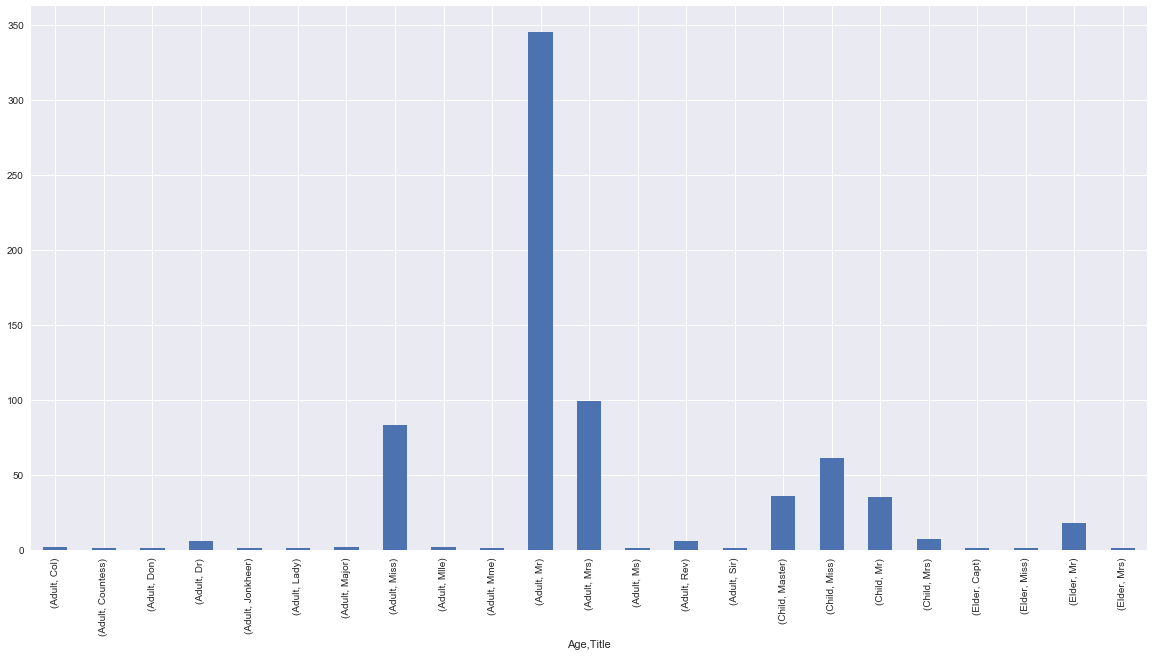

In [141]:
# Plot titles
df.groupby(['Age','Title'])['Survived'].count().plot(kind='bar',figsize=(20,10))

* Adult is usually associated with Miss, Mr and Mrs
* Child can be Master, Miss, Mr or Mrs
* If it's Master, it should be a child [Wikipedia is watching you](https://en.wikipedia.org/wiki/Master_(form_of_address)
* Probably, if it's a Mr or a Mrs, it's an Adult or an Elder. However, it's not always like that.
* If it's a Miss, it's probably not an Elder (times change).

In [142]:
# Check if exists NULL values with title Master
df[(pd.isnull(df['Age'])) & (df['Title']=='Master')]

Survived  Pclass                                               Name  \
65          1       3                           Moubarek, Master. Gerios   
159         0       3                         Sage, Master. Thomas Henry   
176         0       3                      Lefebre, Master. Henry Forbes   
709         1       3  Moubarek, Master. Halim Gonios ("William George")   

      Sex  Age    Ticket     Fare Embarked   Title  Family  
65   male  NaN      2661  15.2458        C  Master       1  
159  male  NaN  CA. 2343  69.5500        S  Master       1  
176  male  NaN      4133  25.4667        S  Master       1  
709  male  NaN      2661  15.2458        C  Master       1

In [143]:
# Get index of those cases
index_master = df[(pd.isnull(df['Age'])) & (df['Title']=='Master')].index
index_master

Int64Index([65, 159, 176, 709], dtype='int64')

In [144]:
# Attribute age 'Child'
df.set_value(index_master, 'Age', 'Child')
df[(pd.isnull(df['Age'])) & (df['Title']=='Master')]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, Ticket, Fare, Embarked, Title, Family]
Index: []

In [ ]:
# Explore role of being with family

In [147]:
df.groupby(['Age','Family'])['Family'].count()

Age    Family
Adult  0         397
       1         155
Child  0          43
       1         100
Elder  0          18
       1           3
Name: Family, dtype: int64

* Child without family? Travelling with family friends?
* Explore detailed info about age

# Name (bin data)

In [62]:
# Standardize titles
df['Title'].replace(['Mlle','Mme','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dr','Master','Ms'],
                    ['Miss','Mrs','Other','Miss','Other','Other','Other','Other','Other','Other','Other','Other','Other','Mrs'],
                    inplace=True)

* In the case of 'Lady' and 'Ms', there's no way to know if it's 'Miss' or 'Mrs'. We decided to associate one of the cases to 'Miss' and the other to 'Mrs'.

In [98]:
# Debug
pd.crosstab(df['Title'], df['Sex'])

Sex    female  male
Title              
Miss      185     0
Mr          0   517
Mrs       127     0
Other       2    60

In [99]:
# Drop 'Name'
df.drop('Name', axis=1, inplace=True)

In [100]:
# Convert 'Title' to categorical
df['Title'] = pd.Categorical(df['Title'])
df.dtypes  # Debug

Survived       int64
Pclass      category
Sex         category
Age         category
Fare         float64
Cabin         object
Embarked    category
Family         int64
Title       category
dtype: object

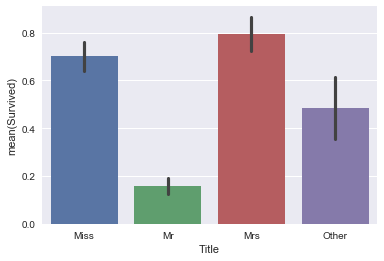

In [101]:
sns.barplot(x='Title',y='Survived', data=df)

* Mrs have a higher survival rate
* Most of the 'other' were men. Higher survival rate than 'Mr'.
* Titanic gives statistical support to Marx's theories

# Testing our assumptions (univariate analysis)

Human beings are known in the galaxy for their cognitive bias (xxx). Accordingly, everytime we xxx, we should follow a 'falsibility' mindset. This concept arouse in the xx's by the hand of Karl Popper. Its main idea is that xxx.

We will start by testing our assumptions using box plots. Box plots are xxx. In this case they are particularly important because most of our data is categorical. Thus, xxx.

# Survived 
* Curiosity!

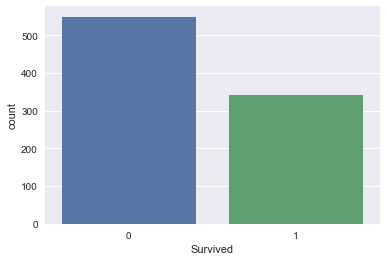

In [71]:
sns.countplot(x='Survived', data=df);

## PClass

In [72]:
# Table of survival vs passenger class
survived_class = pd.crosstab(index=df["Survived"],
                             columns=df["Pclass"],
                             margins=True)
survived_class.columns = ["Class 1","Class 2","Class 3",'rowTotal']
survived_class.index= ["Died","Survived",'colTotal']
survived_class

Class 1  Class 2  Class 3  rowTotal
Died           80       97      372       549
Survived      136       87      119       342
colTotal      216      184      491       891

In [73]:
# Table of survival vs passenger class (%)
survived_class_pct = survived_class/survived_class.loc["colTotal","rowTotal"]
survived_class_pct

Class 1   Class 2   Class 3  rowTotal
Died      0.089787  0.108866  0.417508  0.616162
Survived  0.152637  0.097643  0.133558  0.383838
colTotal  0.242424  0.206510  0.551066  1.000000

In [74]:
# Plot

xxx

## Sex

In [75]:
# Table of survival vs passenger sex
survived_sex = pd.crosstab(index=df["Survived"],
                             columns=df["Sex"],
                             margins=True)
survived_sex.columns = ["Female","Male",'rowTotal']
survived_sex.index= ["Died","Survived",'colTotal']
survived_sex

Female  Male  rowTotal
Died          81   468       549
Survived     233   109       342
colTotal     314   577       891

In [76]:
# Table of survival vs passenger sex (%)
survived_sex_pct = survived_sex/survived_sex.loc["colTotal","rowTotal"]
survived_sex_pct

Female      Male  rowTotal
Died      0.090909  0.525253  0.616162
Survived  0.261504  0.122334  0.383838
colTotal  0.352413  0.647587  1.000000

In [77]:
# Plot

xxx

# Fare

* We expect to see 'Fare' connected to 'Pclass'.
* We expect to see 'Fare' connected to 'Survived'.

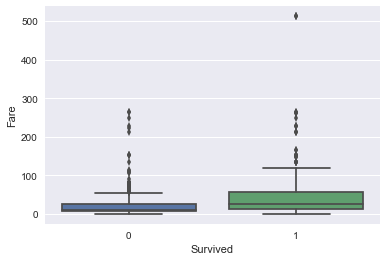

In [85]:
sns.boxplot(x='Survived', y='Fare', data=df);

* Boxplot suggests that people that survived had higher fares

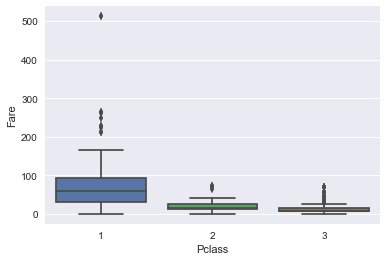

In [86]:
sns.boxplot(x='Pclass', y='Fare', data=df);

* Higher fare, higher class.
* Everything as we expected.

# Cabin

Before wemove to a bivariate analysis, we will deal with string variables. In cabin, we want to extract the letter of the cabin, to see if there's any area of the cruiser that would give you a higher chance to survive (link to airplanes). However, since the Titanic took a long time to sunk, the place in the boat should be irrelevant.

In [87]:
# Inspect cabin
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

* It's easy to extract cabin letter, we just need to take the first char of the string.
* Although it shouldn't be relevant, there are some stranges cases (e.g., F E69, T, B51 B53 B55). We will ignore those cases because it seems that, in general, we can get the cabin letter.

In [88]:
# Extract cabin letter
df['Cabin'] = df['Cabin'].str[0]
df.head()  # Debug

Survived Pclass                                               Name     Sex  \
0         0      3                            Braund, Mr. Owen Harris    male   
1         1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2         1      3                             Heikkinen, Miss. Laina  female   
3         1      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4         0      3                           Allen, Mr. William Henry    male   

     Age            Ticket     Fare Cabin Embarked  Family  
0  Adult         A/5 21171   7.2500   NaN        S       1  
1  Adult          PC 17599  71.2833     C        C       0  
2  Adult  STON/O2. 3101282   7.9250   NaN        S       0  
3  Adult            113803  53.1000     C        S       0  
4  Adult            373450   8.0500   NaN        S       0

* Probably it will not work because we have a lot of missing data.
* Is there any smart way to impute values? Maybe by prices or embarked? Or even a code in ticket? Let's first check if there is any connection between cabin and survived.

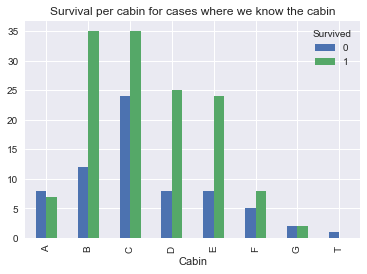

In [89]:
df.groupby(['Cabin','Survived']).count()['Pclass'].unstack().plot(kind='bar')
plt.title('Survival per cabin for cases where we know the cabin');

* BE CAREFUL! This plot hides all the cases with unknown cabin (and those are a lot of cases). That's why it seems that survived more people than died. This makes sense if we think that it's easier to know where people were travelling if they survived to tell the story.
* G and T have few caes, they are not relevant.
* A and C look a little bit different from the others. However, is hard to take conclusions. Is there any statistical test that we can do?

# Ticket

In [90]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

* It's hard to understand the pattern.
* There are some things that we can see repeated. For instance, tickets starting with 'PC'.

In [91]:
df[df['Ticket'].apply(lambda x: x.split(' ')[0]) == 'PC']

Survived Pclass                                               Name  \
1           1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
30          0      1                           Uruchurtu, Don. Manuel E   
31          1      1     Spencer, Mrs. William Augustus (Marie Eugenie)   
34          0      1                            Meyer, Mr. Edgar Joseph   
52          1      1           Harper, Mrs. Henry Sleeper (Myna Haxtun)   
64          0      1                              Stewart, Mr. Albert A   
96          0      1                          Goldschmidt, Mr. George B   
97          1      1                    Greenfield, Mr. William Bertram   
118         0      1                           Baxter, Mr. Quigg Edmond   
139         0      1                                 Giglio, Mr. Victor   
155         0      1                        Williams, Mr. Charles Duane   
168         0      1                                Baumann, Mr. John D   
177         0      1                         Isham, Miss. Ann Elizabeth   
194         1      1          Brown, Mrs. James Joseph (Margaret Tobin)   
195         1      1                               Lurette, Miss. Elise   
256         1      1                     Thorne, Mrs. Gertrude Maybelle   
258         1      1                                   Ward, Miss. Anna   
268         1      1      Graham, Mrs. William Thompson (Edith Junkins)   
269         1      1                             Bissette, Miss. Amelia   
273         0      1                              Natsch, Mr. Charles H   
295         0      1                                  Lewy, Mr. Ervin G   
299         1      1    Baxter, Mrs. James (Helene DeLaudeniere Chaput)   
307         1      1  Penasco y Castellana, Mrs. Victor de Satode (M...   
309         1      1                     Francatelli, Miss. Laura Mabel   
311         1      1                         Ryerson, Miss. Emily Borie   
325         1      1                           Young, Miss. Marie Grice   
332         0      1                          Graham, Mr. George Edward   
334         1      1  Frauenthal, Mrs. Henry William (Clara Heinshei...   
369         1      1                      Aubart, Mme. Leontine Pauline   
373         0      1                                Ringhini, Mr. Sante   
375         1      1              Meyer, Mrs. Edgar Joseph (Leila Saks)   
380         1      1                              Bidois, Miss. Rosalie   
493         0      1                            Artagaveytia, Mr. Ramon   
505         0      1         Penasco y Castellana, Mr. Victor de Satode   
512         1      1                          McGough, Mr. James Robert   
513         1      1     Rothschild, Mrs. Martin (Elizabeth L. Barrett)   
527         0      1                                 Farthing, Mr. John   
537         1      1                                LeRoy, Miss. Bertha   
544         0      1                         Douglas, Mr. Walter Donald   
557         0      1                                Robbins, Mr. Victor   
572         1      1                   Flynn, Mr. John Irwin ("Irving")   
599         1      1       Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")   
609         1      1                          Shutes, Miss. Elizabeth W   
641         1      1                               Sagesser, Mlle. Emma   
645         1      1                          Harper, Mr. Henry Sleeper   
660         1      1                      Frauenthal, Dr. Henry William   
679         1      1                 Cardeza, Mr. Thomas Drake Martinez   
681         1      1                                 Hassab, Mr. Hammad   
700         1      1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
701         1      1                   Silverthorne, Mr. Spencer Victor   
707         1      1                  Calderhead, Mr. Edward Pennington   
710         1      1   Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")   
716         1      1          

* All of them are for the first class
* Difficult to extract more information. Moreover, this is probably information that we have somewhere else. 
 * We have PClass
 * We know if they were travelling alone or not
 * We know in which Cabin they were
* It's difficult to extract more information than this one from one ticket code

In [92]:
# Drop Ticket
df.drop('Ticket', axis=1, inplace=True)

# Bivariate analysis

## Class and sex

In [102]:
surv_sex_class = pd.crosstab(index=df["Survived"], 
                             columns=[df["Pclass"],
                                      df["Sex"]],
                             margins=True)   
surv_sex_class

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [103]:
surv_sex_class/surv_sex_class.loc["All"]    # Divide by column totals

Pclass           1                   2                3                 All
Sex         female      male    female      male female      male          
Survived                                                                   
0         0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
1         0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000

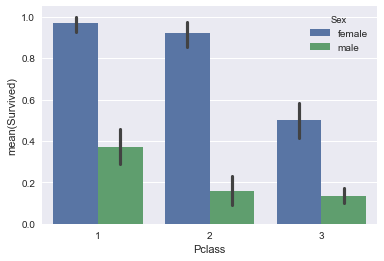

In [104]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

## Missing data

In [105]:
missingData_table(df)

Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245
Title         0  0.000000
Family        0  0.000000
Fare          0  0.000000
Sex           0  0.000000
Pclass        0  0.000000
Survived      0  0.000000

* Missing data in 'Cabin' is extremely high. I'll delete that feature.
* Age and Embarked seem plausible to fill, furthermore we have auxiliary features that can tell us something.

In [106]:
# Drop 'Cabin'
df.drop('Cabin', axis=1, inplace=True)

In [107]:
df[df['Age'].isnull()]

Survived Pclass     Sex  Age      Fare Embarked  Family  Title
5           0      3    male  NaN    8.4583        Q       0     Mr
17          1      2    male  NaN   13.0000        S       0     Mr
19          1      3  female  NaN    7.2250        C       0    Mrs
26          0      3    male  NaN    7.2250        C       0     Mr
28          1      3  female  NaN    7.8792        Q       0   Miss
29          0      3    male  NaN    7.8958        S       0     Mr
31          1      1  female  NaN  146.5208        C       0    Mrs
32          1      3  female  NaN    7.7500        Q       0   Miss
36          1      3    male  NaN    7.2292        C       0     Mr
42          0      3    male  NaN    7.8958        C       0     Mr
45          0      3    male  NaN    8.0500        S       0     Mr
46          0      3    male  NaN   15.5000        Q       1     Mr
47          1      3  female  NaN    7.7500        Q       0   Miss
48          0      3    male  NaN   21.6792        C       1     Mr
55          1      1    male  NaN   35.5000        S       0     Mr
64          0      1    male  NaN   27.7208        C       0     Mr
65          1      3    male  NaN   15.2458        C       1  Other
76          0      3    male  NaN    7.8958        S       0     Mr
77          0      3    male  NaN    8.0500        S       0     Mr
82          1      3  female  NaN    7.7875        Q       0   Miss
87          0      3    male  NaN    8.0500        S       0     Mr
95          0      3    male  NaN    8.0500        S       0     Mr
101         0      3    male  NaN    7.8958        S       0     Mr
107         1      3    male  NaN    7.7750        S       0     Mr
109         1      3  female  NaN   24.1500        Q       0   Miss
121         0      3    male  NaN    8.0500        S       0     Mr
126         0      3    male  NaN    7.7500        Q       0     Mr
128         1      3  female  NaN   22.3583        C       1   Miss
140         0      3  female  NaN   15.2458        C       1    Mrs
154         0      3    male  NaN    7.3125        S       0     Mr
..        ...    ...     ...  ...       ...      ...     ...    ...
718         0      3    male  NaN   15.5000        Q       0     Mr
727         1      3  female  NaN    7.7375        Q       0   Miss
732         0      2    male  NaN    0.0000        S       0     Mr
738         0      3    male  NaN    7.8958        S       0     Mr
739         0      3    male  NaN    7.8958        S       0     Mr
740         1      1    male  NaN   30.0000        S       0     Mr
760         0      3    male  NaN   14.5000        S       0     Mr
766         0      1    male  NaN   39.6000        C       0  Other
768         0      3    male  NaN   24.1500        Q       1     Mr
773         0      3    male  NaN    7.2250        C       0     Mr
776         0      3    male  NaN    7.7500        Q       0     Mr
778         0      3    male  NaN    7.7375        Q       0     Mr
783         0      3    male  NaN   23.4500        S       1     Mr
790         0      3    male  NaN    7.7500        Q       0     Mr
792         0      3  female  NaN   69.5500        S       1   Miss
793         0      1    male  NaN   30.6958        C       0     Mr
815         0      1    male  NaN    0.0000        S       0     Mr
825         0      3    male  NaN    6.9500        Q       0     Mr
826         0      3    male  NaN   56.4958        S       0     Mr
828         1      3    male  NaN    7.7500        Q       0     Mr
832         0      3    male  NaN    7.2292        C       0     Mr
837         0      3    male  NaN    8.0500        S       0     Mr
839         1      1    male  NaN   29.7000        C       0     Mr
846         0      3    male  NaN   69.5500        S       1     Mr
849         1      1  female  NaN   89.1042        C       0    Mrs
859         0      3    male  NaN    7.2292        C       0     Mr
863         0      3  female  NaN   69.5500        S       1 

* If it was travelling without family, it can't be a child
* Median for different titles and sex change
* Survival rate also should influence

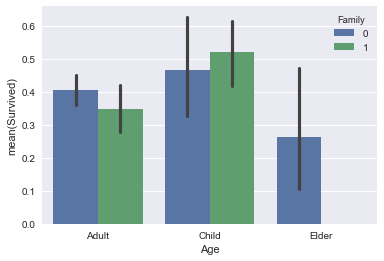

In [108]:
sns.barplot(x='Age', y='Survived',hue='Family', data=df)

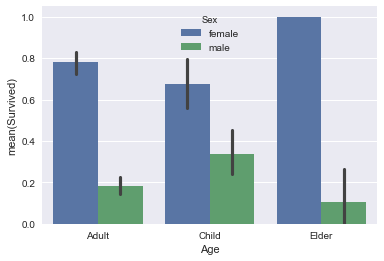

In [109]:
sns.barplot(x='Age', y='Survived',hue='Sex', data=df)

* Age, sex and survived give more hints about 'age'
* Consider that if it's travelling without family, it can't be a child

In [110]:
df[(df['Family']==0) & (df['Age']=='Child')]

Survived Pclass     Sex    Age      Fare Embarked  Family  Title
9           1      2  female  Child   30.0708        C       0    Mrs
14          0      3  female  Child    7.8542        S       0   Miss
22          1      3  female  Child    8.0292        Q       0   Miss
39          1      3  female  Child   11.2417        C       0   Miss
84          1      2  female  Child   10.5000        S       0   Miss
114         0      3  female  Child   14.4583        C       0   Miss
125         1      3    male  Child   11.2417        C       0  Other
138         0      3    male  Child    9.2167        S       0     Mr
144         0      2    male  Child   11.5000        S       0     Mr
156         1      3  female  Child    7.7333        Q       0   Miss
163         0      3    male  Child    8.6625        S       0     Mr
204         1      3    male  Child    8.0500        S       0     Mr
208         1      3  female  Child    7.7500        Q       0   Miss
220         1      3    male  Child    8.0500        S       0     Mr
228         0      2    male  Child   13.0000        S       0     Mr
282         0      3    male  Child    9.5000        S       0     Mr
307         1      1  female  Child  108.9000        C       0    Mrs
385         0      2    male  Child   73.5000        S       0     Mr
389         1      2  female  Child   12.0000        C       0   Miss
433         0      3    male  Child    7.1250        S       0     Mr
500         0      3    male  Child    8.6625        S       0     Mr
504         1      1  female  Child   86.5000        S       0   Miss
574         0      3    male  Child    8.0500        S       0     Mr
654         0      3  female  Child    6.7500        Q       0   Miss
675         0      3    male  Child    7.7750        S       0     Mr
677         1      3  female  Child    9.8417        S       0   Miss
688         0      3    male  Child    7.7958        S       0     Mr
700         1      1  female  Child  227.5250        C       0    Mrs
731         0      3    male  Child   18.7875        C       0     Mr
757         0      2    male  Child   11.5000        S       0     Mr
764         0      3    male  Child    7.7750        S       0     Mr
775         0      3    male  Child    7.7500        S       0     Mr
777         1      3  female  Child   12.4750        S       0   Miss
780         1      3  female  Child    7.2292        C       0   Miss
781         1      1  female  Child   57.0000        S       0    Mrs
786         1      3  female  Child    7.4958        S       0   Miss
791         0      2    male  Child   26.0000        S       0     Mr
807         0      3  female  Child    7.7750        S       0   Miss
830         1      3  female  Child   14.4542        C       0    Mrs
834         0      3    male  Child    8.3000        S       0     Mr
841         0      2    male  Child   10.5000        S       0     Mr
844         0      3    male  Child    8.6625        S       0     Mr
875         1      3  female  Child    7.2250        C       0   Miss

* This shouldn't happen...

## Outliers

# Conclusions

* I'm depressed because if I was in Titanic, I'd probably not survive.
* Things changed in Costa Concordia (link). Are times changing?

# References
* Wellbye, R. (1922). The Stages of Human Life. The Sociological Review, 14(3), 220-224.

* Internal links in Jupyter Notebook: http://sebastianraschka.com/Articles/2014_ipython_internal_links.html